### Decision Tree Regression
CART -> Classification And **Regression** Trees

* Assume that we have two independent variables (x_1 & x_2)
    1. when plotted they form 2-d (scatter) plot
* We are predicting dependent variable 'y' (on 3rd dimension so would not be able to see it on the 2-d plot of x_1 & x_2)
* Splits are performed on IVs using *information entropy*
    1. is split increasing information about our points?
    2. once algorithm can no longer produce any splits (or leaves) it stops running
    3. final leaves are called terminal leaves

##### The whole point of the decision tree is to add more information into our system so that we can better predict 'y'

##### Notes on split walkthrough (hard to describe so go to section 8, lecture 64 if need be)

* first split happened at x_1 < 20
    -  (**NO**) second split happened at x_2 < 170
        -  (**NO**)
        -  (**YES**) fourth split happened at x_1 < 40
            -  (**NO**)
            -  (**YES**)
    -  (**YES**) third split happened at x_2 < 200
        -  (**NO**)
        -  (**YES**)
* take average of each terminal leaf (and that will be the value assigned to any point that falls within that terminal leaf)
* Example:
    -  we know that average of leaf where (20 < x_1 < 40) & (0 < x_2 < 170) is -64.1
    -  say new input is (x_1 = 30, x_2 = 50)
    -  predicted value of y = -64.1

##### Rewritten tree from walkthrough w/ average values included
* first split happened at x_1 < 20
    -  (**NO**) second split happened at x_2 < 170
        -  (**NO**) -> Value: 1023
        -  (**YES**) fourth split happened at x_1 < 40
            -  (**NO**) -> Value: 0.7
            -  (**YES**) -> Value: -64.1
    -  (**YES**) third split happened at x_2 < 200
        -  (**NO**) -> Value: 65.7
        -  (**YES**) -> Value: 300.5

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [3]:
# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [4]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [5]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [7]:
# Predicting a new result
y_pred = regressor.predict(6.5)
print(y_pred)

[ 150000.]


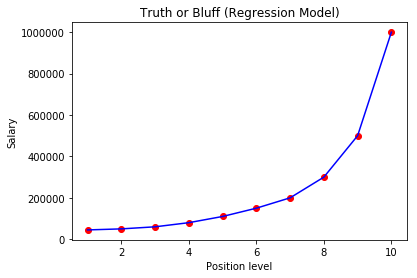

In [8]:
# Visualising the Decision Tree Regression results
%matplotlib inline
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

* Looks like we got a trap!!! -> problem with our plotting 
* (taking average of each interval) -> is what model predicts
* decision tree regression is non-continuos, but plot shows it as continuous because it draws the line; therefore, we need more prediction points

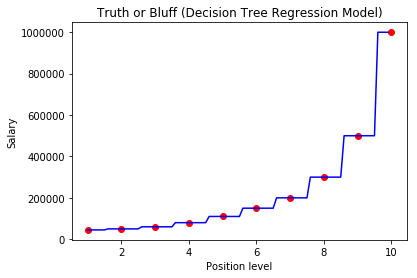

In [10]:
# Visualising the Decision Tree Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

We should even have some strictly vertical lines here to represent non-continuity

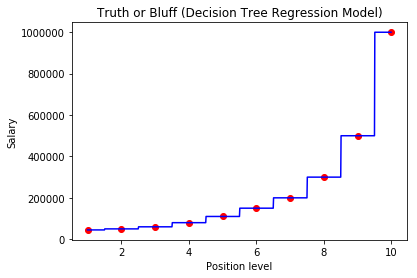

In [11]:
# Visualising the Decision Tree Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

##### This is a powerful model for higher dimensions (just an fyi)